## Inroduction
Seldom deal with count things here, instead, many real values are get analysized in this notebook.
Analyse the data in each dimension, namely: 
- "Trade Value (US$)" 
- "Trade Flow"
- "Reporter"
- "Partner"
- "Commodity"

In [1]:
import os, sys
currentdir = os.path.realpath(os.path.abspath(""))
scriptsdir = os.path.dirname(currentdir)
if scriptsdir not in sys.path:
    sys.path.append(scriptsdir)

# uncomment configuration if don't want show multiple outputs in a cell
from customscripts import configuration
from customscripts import utils

import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
import zipfile
zip_dir = utils.get_dataset_dir()
zip_path = f"{zip_dir}/food_data.zip"
zip_read = zipfile.ZipFile(zip_path)
food_data_csv = zip_read.extractall(zip_dir)
food_raw_data = pd.read_csv(f"{zip_dir}/food_data.csv")

In [3]:
print(f"Original dataset has columns: \n {food_raw_data.columns}")
print(f"Original dataset has shape：\n {food_raw_data.shape}")

Original dataset has columns: 
 Index(['Unnamed: 0', 'Classification', 'Year', 'Trade Flow Code', 'Trade Flow',
       'Reporter Code', 'Reporter', 'Partner Code', 'Partner',
       'Commodity Code', 'Commodity', 'Trade Value (US$)'],
      dtype='object')
Original dataset has shape：
 (849267, 12)


## Clean the data
1. Clean the data, delete columns which contains repeated information, such as:
- "Trade Flow Code" | "Trade Flow"
- "Reporter Code" | "Reporter"
- "Partner Code" | "Partner"
- "Commodity Code" | "Commodity"

2. Also delete the information of no use, which is the column "Classification"
3. Change the data type in column 'Year' to str for better visualization

In [4]:
food_data_dropnan = food_raw_data.dropna(axis=1, how='all')
food_data_clean = food_data_dropnan.drop(columns=["Unnamed: 0", 'Classification', 'Trade Flow Code', 'Reporter Code', "Partner Code", 'Commodity'])

food_data_clean['Year'] = food_data_clean['Year'].astype(str)

In [5]:
# Now see some general desctiption of the cleaned dataset
print(f"Cleaned dataset has columns: \n {food_data_clean.columns} \n")
print(f"Cleaned dataset shape： {food_data_clean.shape} \n")
print(f"The records are from {len(food_data_clean['Year'].unique())} different years: {food_data_clean['Year'].unique()} \n")
print(f"There are {len(food_data_clean['Trade Flow'].unique())} kinds of trade flows: {food_data_clean['Trade Flow'].unique()} \n")
print(f"There are totally {len(food_data_clean['Reporter'].unique())} reporters: {food_data_clean['Reporter'].unique()} \n")
print(f"There are totally {len(food_data_clean['Partner'].unique())} partners\n")
print(f"There are totally {len(food_data_clean['Commodity Code'].unique())} kinds of commodities")

Cleaned dataset has columns: 
 Index(['Year', 'Trade Flow', 'Reporter', 'Partner', 'Commodity Code',
       'Trade Value (US$)'],
      dtype='object') 

Cleaned dataset shape： (849267, 6) 

The records are from 20 different years: ['2018' '2019' '2017' '2016' '2014' '2015' '2012' '2013' '2010' '2011'
 '2008' '2009' '2007' '2006' '2004' '2005' '2002' '2003' '2000' '2001'] 

There are 2 kinds of trade flows: ['Import' 'Export'] 

There are totally 13 reporters: ['Canada' 'China' 'France' 'Germany' 'China, Hong Kong SAR' 'India'
 'Italy' 'Japan' 'Mexico' 'Netherlands' 'Rep. of Korea' 'United Kingdom'
 'USA'] 

There are totally 247 partners

There are totally 17 kinds of commodities


## Trade Value

In [6]:
# first let's see some typecal values in this dimension
print(f"Min trade value: $ {food_data_clean['Trade Value (US$)'].min():,}")
print(f"Max trade value: $ {food_data_clean['Trade Value (US$)'].max():,}")
print(f"Mean trade value: $ {food_data_clean['Trade Value (US$)'].mean():,}")
print(f"Median trade value: $ {food_data_clean['Trade Value (US$)'].median():,}")

# to see the quantile numbers of trade value
food_data_clean['Trade Value (US$)'].quantile([0.25, 0.5, 0.75])

Min trade value: $ 0
Max trade value: $ 45,887,757,490
Mean trade value: $ 44,529,850.22049603
Median trade value: $ 439,443.0


0.25      40000.0
0.50     439443.0
0.75    4556688.5
Name: Trade Value (US$), dtype: float64

<AxesSubplot:title={'center':'Trade Value in recent 20 years'}, xlabel='Year'>

Text(108.0, 0.5, 'Trade Value (US$)')

<AxesSubplot:title={'center':'Trade Value of 2 flows over 20 years'}, xlabel='Year'>

Text(564.5454545454544, 0.5, 'Trade Value (US$)')

<AxesSubplot:title={'center':'Trade Value Growth Fluctuations over 20 years'}, xlabel='Year'>

Text(108.0, 0.5, 'Trade Value (US$)')

<AxesSubplot:title={'center':'Trade Value Growth Rate Fluctuations over 20 years'}, xlabel='Year'>

Text(564.5454545454544, 0.5, 'Growth Rate (%)')

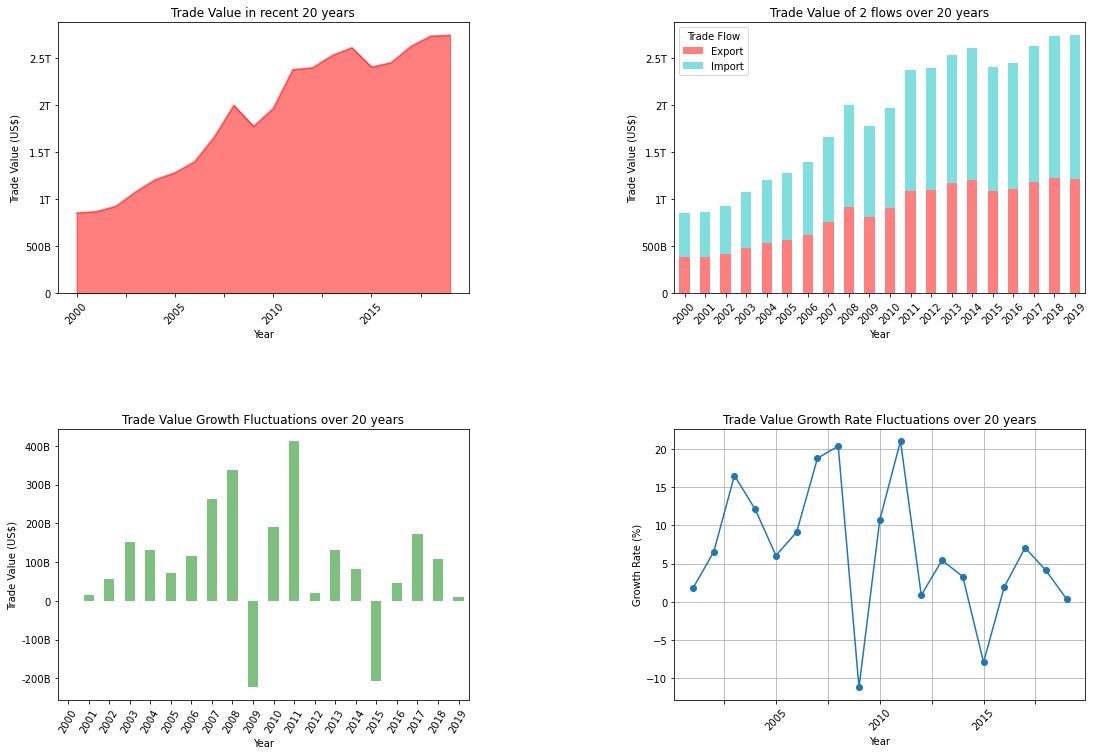

In [7]:
# see the trade value as time goes by
fig_1, ax_1 = plt.subplots(2, 2, figsize=(15, 10))

# unpack all the axes subplots
ax_1_unpack = ax_1.ravel()

# set the layout between different subplots for better visualization
fig_1.tight_layout()
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# total trade value with the development of time
year_value = food_data_clean.groupby('Year')['Trade Value (US$)'].sum()
year_value.plot(kind='area', ax=ax_1_unpack[0], color='r', alpha=0.5, title="Trade Value in recent 20 years", rot=45)
# change the unit of trade value
formatter = ticker.FuncFormatter(utils.human_format)
ax_1_unpack[0].yaxis.set_major_formatter(formatter)
ax_1_unpack[0].yaxis.set_label_text("Trade Value (US$)")



# then what's the ration betweent these two flows?
flow_value_contrast = food_data_clean.groupby(['Year', 'Trade Flow']).sum()
flow_value_contrast["Trade Value (US$)"].unstack().plot(kind='bar', ax=ax_1_unpack[1], stacked=True, color=['r','c'], rot=45, alpha=0.5, title='Trade Value of 2 flows over 20 years')
ax_1_unpack[1].yaxis.set_major_formatter(formatter)
ax_1_unpack[1].yaxis.set_label_text("Trade Value (US$)")



# show the growth value of different classes over 20 years
year_growth_value = year_value.diff()
year_growth_value.plot(ax=ax_1_unpack[2], kind='bar', color='g', alpha=0.5, title='Trade Value Growth Fluctuations over 20 years', rot=60)
ax_1_unpack[2].yaxis.set_major_formatter(formatter)
ax_1_unpack[2].yaxis.set_label_text("Trade Value (US$)")



# similarly, we can also apply the aforementioned procedure to different kinds of trade flows
year_growth_rate = year_growth_value / year_value.shift() * 100
year_growth_rate.plot(ax=ax_1_unpack[3], title="Trade Value Growth Rate Fluctuations over 20 years", rot=45, marker='o', grid=True)
ax_1_unpack[3].yaxis.set_label_text("Growth Rate (%)")
# ax_1_unpack[3].axhline(0, color='r')

<AxesSubplot:title={'center':'Trade Value of different flows over 20 years'}, xlabel='Year'>

Text(108.0, 0.5, 'Trade Value (US$)')

<AxesSubplot:title={'center':'Trade Value Growth and Rate of different flows over 20 years'}, xlabel='Trade Flow'>

Text(564.5454545454544, 0.5, 'Trade Value - Growth Value(US$)')

Text(0, 0.5, 'Trade Value - Growth Rate (%)')

<AxesSubplot:title={'center':'Trade Value Growth Fluctuation over 20 years'}, xlabel='Year'>

Text(108.0, 0.5, 'Trade Value (US$)')

<AxesSubplot:title={'center':'Trade Value Growth Rate fluctuations of different flows over 20 years'}, xlabel='Year'>

Text(564.5454545454544, 0.5, 'Growth Rate (%)')

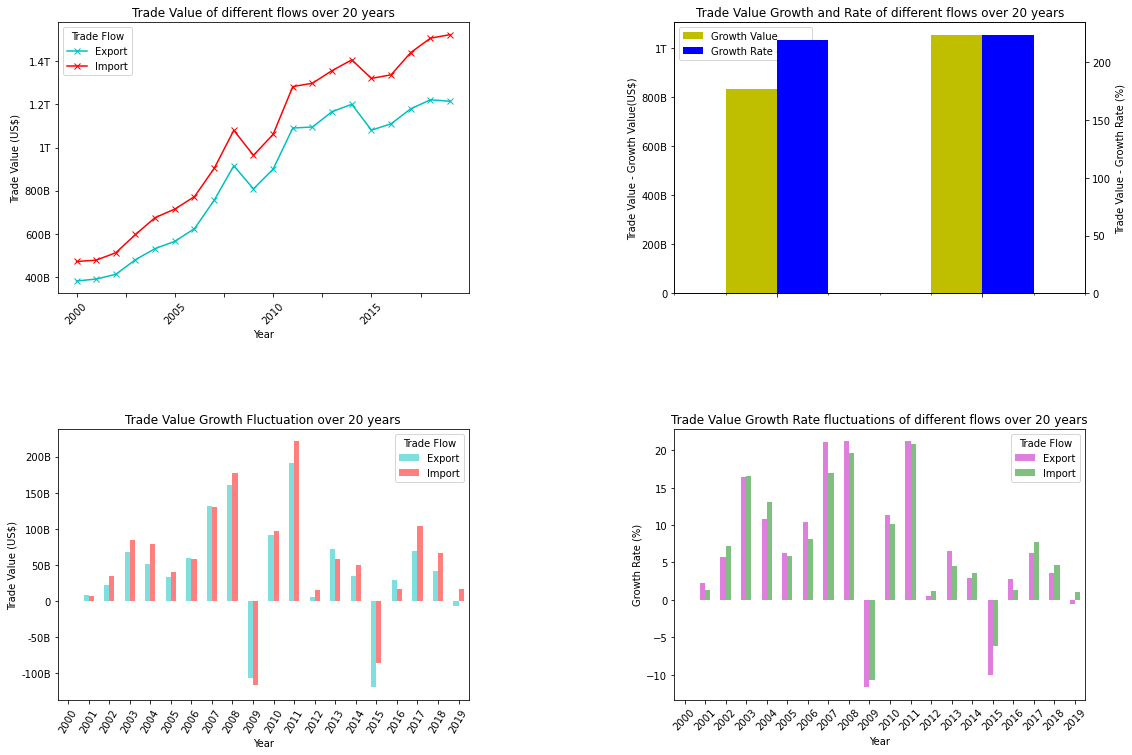

In [8]:
# since there are only 2 kinds of trade flows, we can visualize also apply the same procedure to it
fig_23, ax_23 = plt.subplots(2, 2, figsize=(15, 10))
# unpack all the axes subplots
ax_23_unpack = ax_23.ravel()
# set the layout between different subplots for better visualization
fig_23.tight_layout()
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# show the trend of trade values of different trade flows over 20 years
flow_year_value = food_data_clean['Trade Value (US$)'] \
    .groupby([food_data_clean['Year'], food_data_clean['Trade Flow']]) \
    .sum() \
    .unstack()
flow_year_value.plot(ax=ax_23_unpack[0], color=['c','r'], title="Trade Value of different flows over 20 years", rot=45, marker='x')
ax_23_unpack[0].yaxis.set_major_formatter(formatter)
ax_23_unpack[0].yaxis.set_label_text("Trade Value (US$)")



# show the growth value and growth rate of different flows of 20 years in total
flow_total_growth_value = flow_year_value.diff() \
    .sum() \
    .sort_values(ascending=True)
flow_total_base = flow_year_value[0:1].sum()
flow_total_growth_rate = (flow_total_growth_value / flow_total_base * 100).sort_values(ascending=True)
flow_total_growth_value_rate = pd.concat([flow_total_growth_value, flow_total_growth_rate], axis=1)
flow_total_growth_value_rate.columns = ['Growth Value', 'Growth Rate']
flow_total_growth_value_rate.plot(ax=ax_23_unpack[1], kind='bar', color=['y','b'], title='Trade Value Growth and Rate of different flows over 20 years', secondary_y=['Growth Rate'], rot=60)
ax_23_unpack[1].yaxis.set_major_formatter(formatter)
ax_23_unpack[1].yaxis.set_label_text("Trade Value - Growth Value(US$)")
ax_23_unpack[1].right_ax.set_ylabel("Trade Value - Growth Rate (%)")


# show the growth value fluctuations of different flows over 20 years
flow_year_growth_value = flow_year_value.diff()
flow_year_growth_value.plot(ax=ax_23_unpack[2], kind='bar', color=['c','r'], alpha=0.5, title='Trade Value Growth Fluctuation over 20 years', rot=60)
ax_23_unpack[2].yaxis.set_major_formatter(formatter)
ax_23_unpack[2].yaxis.set_label_text("Trade Value (US$)")



# then show the growth rate fluctuations of different flows over 20 years
num = flow_year_growth_value
den = flow_year_value.shift()
flow_year_grawth_rate = num / den * 100
flow_year_grawth_rate.plot(ax=ax_23_unpack[3], kind='bar', color=['m', 'g'], alpha=0.5, title='Trade Value Growth Rate fluctuations of different flows over 20 years', rot=45)
ax_23_unpack[3].yaxis.set_label_text("Growth Rate (%)")

## Commodity
Now let's see the properties of commodity w.r.t. other dimensions

<AxesSubplot:title={'center':'Trade Value of different commodities in recent 20 years'}, xlabel='Year'>

Text(108.0, 0.5, 'Trade Value (US$)')

<AxesSubplot:title={'center':'Trade Value Growth and Rate of different commodities over 20 years'}, xlabel='Commodity Code'>

Text(564.5454545454544, 0.5, 'Trade Value - Growth Value (US$)')

Text(0, 0.5, 'Trade Value - Growth Rate (%)')

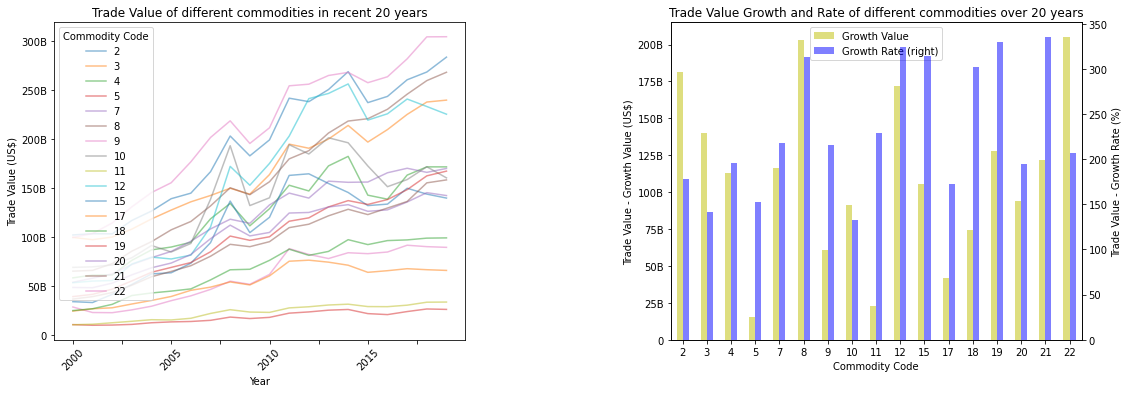

In [9]:
# Then what about different kind of commodies's time depandancy
fig_12, ax_12 = plt.subplots(1, 2, figsize=(15, 5))
# unpack all the axes subplots
ax_12_unpack = ax_12.ravel()
# set the layout between different subplots for better visualization
fig_12.tight_layout()
plt.subplots_adjust(wspace=0.5, hspace=0.5)


# show the trend of diffent kind of commodities over 20 years
commodity_value_year = food_data_clean['Trade Value (US$)'] \
    .groupby([food_data_clean['Year'], food_data_clean['Commodity Code']]) \
    .sum() \
    .unstack()
commodity_value_year.plot(ax=ax_12_unpack[0], alpha=0.5, title="Trade Value of different commodities in recent 20 years", rot=45)
ax_12_unpack[0].yaxis.set_major_formatter(formatter)
ax_12_unpack[0].yaxis.set_label_text("Trade Value (US$)")


# what about the growth value in these 20 years?
# set the commodity in ascending order
commodity_total_growth_value = commodity_value_year.diff().sum()
# then show the growth rate of different commodities over 20 years
commodity_base = commodity_value_year[0:1].sum()
commodity_total_growth_rate = (commodity_total_growth_value / commodity_base * 100)


# show the growth value and growth rate of different commodities of 20 years in total
commodity_total_growth_value_rate = pd.concat([commodity_total_growth_value, commodity_total_growth_rate], axis=1)
commodity_total_growth_value_rate.columns = ['Growth Value', 'Growth Rate']
commodity_total_growth_value_rate.plot(ax=ax_12_unpack[1], kind='bar', color=['y','b'], title='Trade Value Growth and Rate of different commodities over 20 years', secondary_y=['Growth Rate'],rot=0, alpha=0.5)
ax_12_unpack[1].yaxis.set_major_formatter(formatter)
ax_12_unpack[1].yaxis.set_label_text("Trade Value - Growth Value (US$)")
ax_12_unpack[1].right_ax.set_ylabel("Trade Value - Growth Rate (%)")

<AxesSubplot:title={'center':'Trade value of commodity 2 over 20 years'}, xlabel='Year'>

Text(108.0, 0.5, 'Trade Value (US$)')

<AxesSubplot:title={'center':'Growth value of commodity 2 over 20 years'}, xlabel='Year'>

Text(564.5454545454544, 0.5, 'Trade Value Growth (US$)')

Text(0, 0.5, 'Trade Value - Growth Rate (%)')

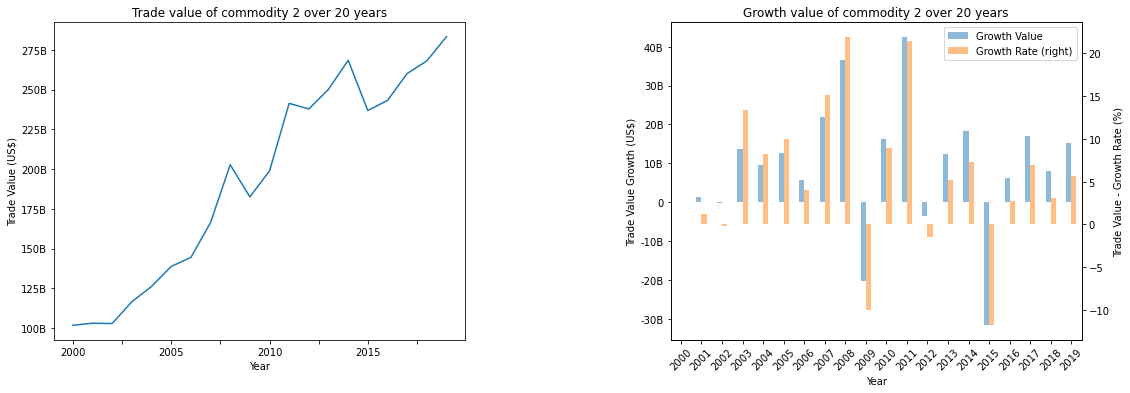

In [10]:
# above graph shows the trade value growth and rate of 20 years in total
# let's visualize the data of individual commodities
# take the commodity with code '2' for example
fig_79, ax_79 = plt.subplots(1, 2, figsize=(15, 5))
# unpack all the axes subplots
ax_79_unpack = ax_79.ravel()
# set the layout between different subplots for better visualization
fig_79.tight_layout()
plt.subplots_adjust(wspace=0.5, hspace=0.5)


# first the trend of commodity
individual_commodity_trend = commodity_value_year[2]
individual_commodity_trend.plot(ax=ax_79_unpack[0], title="Trade value of commodity 2 over 20 years" )
ax_79_unpack[0].yaxis.set_major_formatter(formatter)
ax_79_unpack[0].yaxis.set_label_text('Trade Value (US$)')

# the show the trade value growth
individual_commodity_growth_value_year = individual_commodity_trend.diff()

# then is the trafe value growth rate
individual_commodity_growth_value_base = individual_commodity_trend.shift()
individual_commodity_growth_rate_year = individual_commodity_growth_value_year / individual_commodity_growth_value_base * 100

# then concatenate the two together
individual_commodity_growth_value_rate = pd.concat([individual_commodity_growth_value_year, individual_commodity_growth_rate_year], axis=1)
individual_commodity_growth_value_rate.columns = ['Growth Value', 'Growth Rate']
individual_commodity_growth_value_rate.plot(ax=ax_79_unpack[1], kind='bar', alpha=0.5, rot=45, secondary_y=['Growth Rate'], title="Growth value of commodity 2 over 20 years" )

ax_79_unpack[1].yaxis.set_major_formatter(formatter)
ax_79_unpack[1].yaxis.set_label_text('Trade Value Growth (US$)')
ax_79_unpack[1].right_ax.set_ylabel("Trade Value - Growth Rate (%)")

# then this procedute can be applied to each individual commodities by just changing the commodity code

<AxesSubplot:title={'center':'Trade Value Percentage of different commodities of USA in 2000'}, ylabel='USA'>

<AxesSubplot:title={'center':'Trade Value of different commodities of USA in 2000'}, xlabel='Commodity Code'>

Text(564.5454545454544, 0.5, 'Trade Value Growth (US$)')

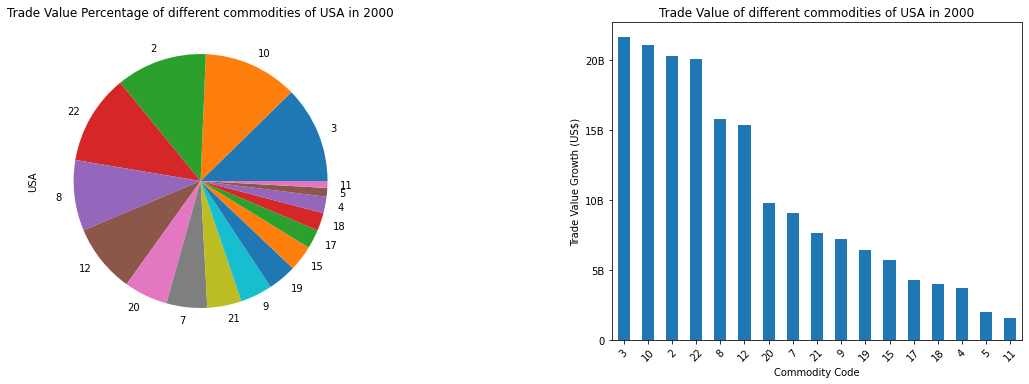

In [11]:
# above graph shows the trade value growth and rate of 20 years in total
# let's visualize the data of individual commodities
# take the commodity with code '2' for example
fig_52, ax_52 = plt.subplots(1, 2, figsize=(15, 5))
# unpack all the axes subplots
ax_52_unpack = ax_52.ravel()
# set the layout between different subplots for better visualization
fig_52.tight_layout()
plt.subplots_adjust(wspace=0.5, hspace=0.5)

commodity_value_year_reporter = food_data_clean['Trade Value (US$)'] \
    .groupby([food_data_clean['Year'], food_data_clean['Commodity Code'], food_data_clean['Reporter']]) \
    .sum() \
    .unstack()

# draw the commodity trade value in particular reporter, particular year
# for example, commodity trade value of USA in 2000
commodity_value_year_reporter['USA'] \
    .loc['2000'] \
    .sort_values(ascending=False) \
    .plot(ax=ax_52_unpack[0], kind='pie', title='Trade Value Percentage of different commodities of USA in 2000')

commodity_value_year_reporter['USA'] \
    .loc['2000'] \
    .sort_values(ascending=False) \
    .plot(ax=ax_52_unpack[1], kind='bar', title='Trade Value of different commodities of USA in 2000', rot=45)
ax_52_unpack[1].yaxis.set_major_formatter(formatter)
ax_52_unpack[1].yaxis.set_label_text('Trade Value Growth (US$)')


# can also be applied to other reporters in different years
# can just replace reporter with partner and then get the corresponding data of partners

## Reporters
Now let's dig into individual reporters and find a paradigm for each reporter

<AxesSubplot:ylabel='Reporter'>

Text(0.5, 365.50909090909096, 'Trade Value (US$)')

<AxesSubplot:title={'center':'Ratio between export/import'}, xlabel='Reporter', ylabel='Export / Import Ratio'>

Text(564.5454545454544, 0.5, 'Trade Value (US$)')

<AxesSubplot:ylabel='Reporter'>

Text(0.5, 69.00000000000009, 'Trave Value (US$)')

<AxesSubplot:title={'center':'Trade Value of different reporters over 20 years'}, xlabel='Year'>

Text(564.5454545454544, 0.5, 'Trade Value (US$)')

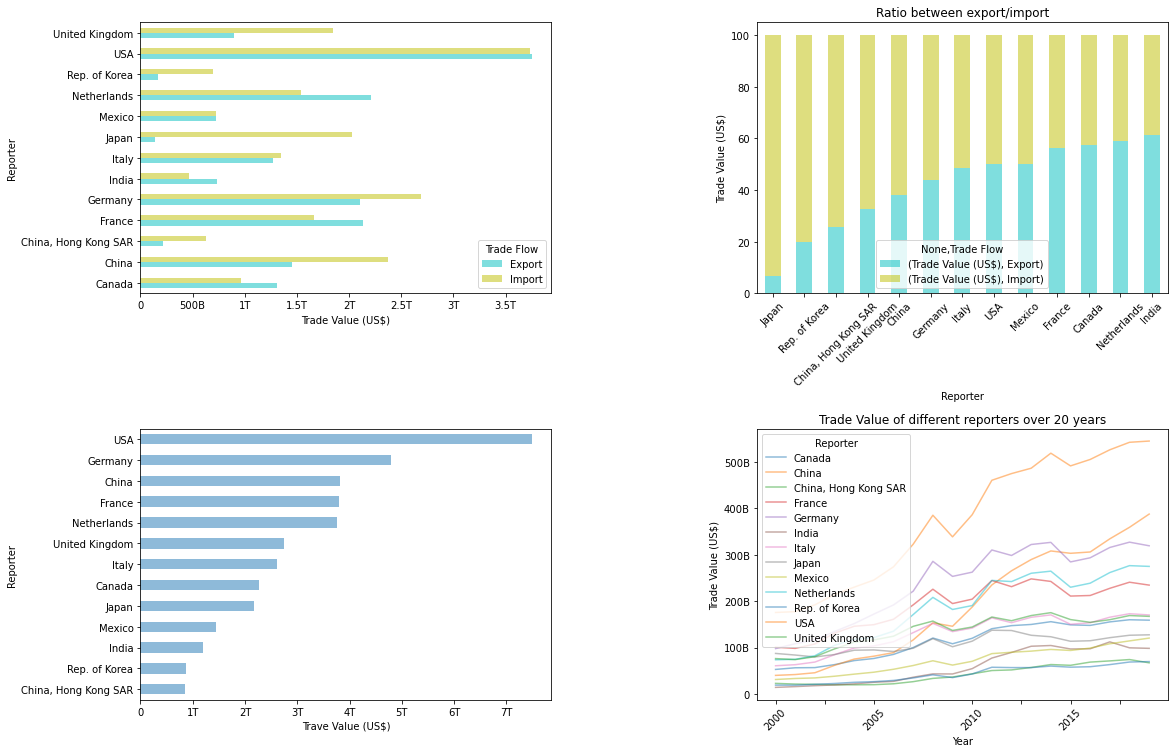

In [12]:
# visualize the trade value given different reporters, and for each reporter show the difference between trade flows

# to see which kind of trade flow can make the most profit in average
fig_42, ax_42 = plt.subplots(2, 2, figsize=(15, 10))
# unpack all the axes subplots
ax_42_unpack = ax_42.ravel()
fig_42.tight_layout()
plt.subplots_adjust(wspace=0.5, hspace=0.5)


# first have a glance of the 2 kinds of trade flow values of each reporters
value_reporter_flow = food_data_clean['Trade Value (US$)'] \
    .groupby([food_data_clean['Reporter'], food_data_clean['Trade Flow']]) \
    .sum() \
    .unstack()
value_reporter_flow.plot(ax=ax_42_unpack[0], kind="barh", color=['c','y'], alpha=0.5)
ax_42_unpack[0].xaxis.set_major_formatter(formatter)
ax_42_unpack[0].xaxis.set_label_text("Trade Value (US$)")



# then we can campare the ratio of these 2 kinds of flows for each countries
ratio_reporter = food_data_clean[food_data_clean["Trade Flow"].isin(["Import", "Export"])] \
    .groupby(["Reporter", "Trade Flow"]).agg({"Trade Value (US$)": sum}) \
    .groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack().fillna(0) \
    .sort_values(by=('Trade Value (US$)', 'Import'), ascending=False)
ratio_reporter.plot(kind="bar", ax=ax_42_unpack[1], stacked=True, title="Ratio between export/import", ylabel="Export / Import Ratio", color=['c','y'], rot=45, alpha=0.5)
ax_42_unpack[1].yaxis.set_major_formatter(formatter)
ax_42_unpack[1].yaxis.set_label_text("Trade Value (US$)")



# then we can order the total trade value of individual reporters in descending way
value_reporter_descend = food_data_clean.groupby("Reporter")["Trade Value (US$)"].sum().sort_values(ascending=False)
value_reporter_descend.plot(kind="barh", ax=ax_42_unpack[2], alpha=0.5)
ax_42_unpack[2].invert_yaxis()  # labels read top-to-bottom
ax_42_unpack[2].xaxis.set_major_formatter(formatter)
ax_42_unpack[2].xaxis.set_label_text("Trave Value (US$)")



value_reporter_year = food_data_clean['Trade Value (US$)'] \
    .groupby([food_data_clean['Year'], food_data_clean['Reporter']]) \
    .sum() \
    .unstack()
value_reporter_year.plot(ax=ax_42_unpack[3], alpha=0.5, title="Trade Value of different reporters over 20 years", rot=45)
ax_42_unpack[3].yaxis.set_major_formatter(formatter)
ax_42_unpack[3].yaxis.set_label_text("Trade Value (US$)")


<AxesSubplot:title={'center':'Trade Value Percentage of different reporters over 20 years'}, ylabel='Trade Value (US$)'>

<AxesSubplot:title={'center':'Trade Value of different reporters over 20 years'}, ylabel='Reporter'>

Text(0.5, 24.0, 'Trade Value Growth (US$)')

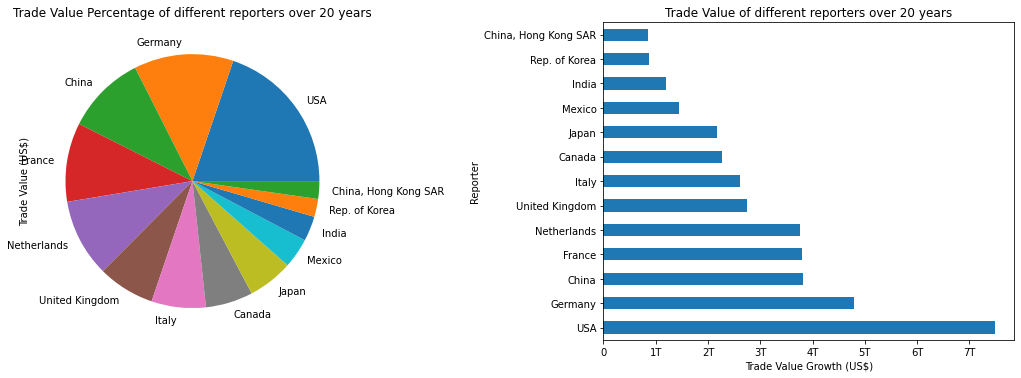

In [13]:
reporter_value_order = food_data_clean \
    .groupby("Reporter")["Trade Value (US$)"] \
    .sum() \
    .sort_values(ascending=False) \


fig_74, ax_74 = plt.subplots(1, 2, figsize=(15, 5))
# unpack all the axes subplots
ax_74_unpack = ax_74.ravel()
# set the layout between different subplots for better visualization
fig_74.tight_layout()
plt.subplots_adjust(wspace=0.5, hspace=0.5)

reporter_value_order.plot(ax=ax_74_unpack[0], kind='pie', title='Trade Value Percentage of different reporters over 20 years')
reporter_value_order.plot(ax=ax_74_unpack[1], kind='barh', title='Trade Value of different reporters over 20 years')
ax_74_unpack[1].xaxis.set_major_formatter(formatter)
ax_74_unpack[1].xaxis.set_label_text('Trade Value Growth (US$)')

In [14]:
reporter_value_year = food_data_clean['Trade Value (US$)'] \
    .groupby([food_data_clean['Year'], food_data_clean['Reporter']]) \
    .sum() \
    .unstack()

<AxesSubplot:title={'center':'Trade Value of USA over 20 years'}, xlabel='Year'>

Text(108.0, 0.5, 'Trade Value (US$)')

<AxesSubplot:title={'center':'Trade Value Growth of USA over 20 years'}, xlabel='Year'>

Text(564.5454545454544, 0.5, 'Trade Value (US$)')

The total Growth Values of USA is 369008204074.0 over 20 years 

The total Growth Values Rate of USA is 210.307% over 20 years 



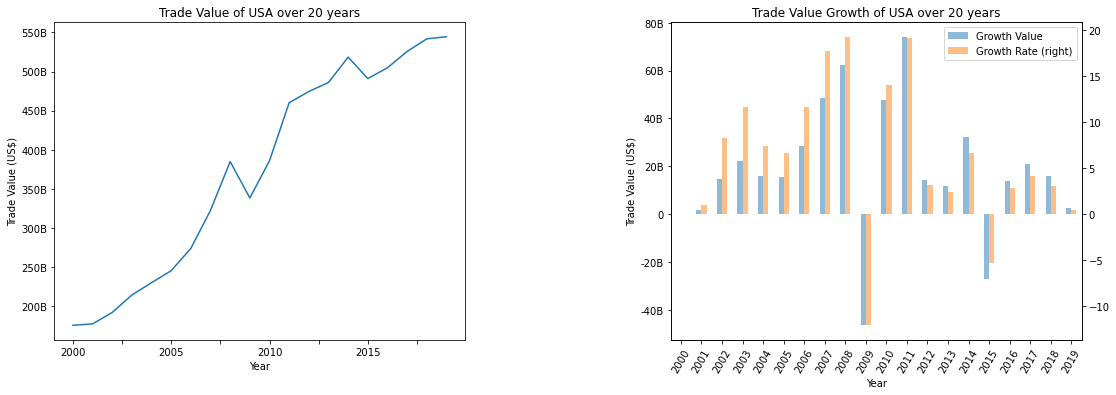

In [15]:
# Then what about different reporter's time depandancy of trade value
fig_66, ax_66 = plt.subplots(1, 2, figsize=(15, 5))
# unpack all the axes subplots
ax_66_unpack = ax_66.ravel()
# set the layout between different subplots for better visualization
fig_66.tight_layout()
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Now let's first see for example the trade value of USA
# after get a fixed paradigm, then we can apply this to all other reporters
USA_year_value = reporter_value_year['USA']
USA_year_value.plot(ax=ax_66_unpack[0], title='Trade Value of USA over 20 years')
ax_66_unpack[0].yaxis.set_major_formatter(formatter)
ax_66_unpack[0].yaxis.set_label_text("Trade Value (US$)")

# show the growth value of different classes over 20 years
USA_year_growth_value = USA_year_value.diff()
# similarly, we can also apply the aforementioned procedure to different kinds of trade flows
USA_year_growth_rate = USA_year_growth_value / USA_year_value.shift() * 100
USA_year_growth_value_rate = pd.concat([USA_year_growth_value, USA_year_growth_rate], axis=1)
USA_year_growth_value_rate.columns = ['Growth Value', 'Growth Rate']

USA_year_growth_value_rate.plot(ax=ax_66_unpack[1], kind='bar', alpha=0.5, title='Trade Value Growth of USA over 20 years', rot=60, secondary_y=['Growth Rate'])
ax_66_unpack[1].yaxis.set_major_formatter(formatter)
ax_66_unpack[1].yaxis.set_label_text("Trade Value (US$)")

# USA_year_growth_rate.plot(ax=ax_66_unpack[2], title="Trade Value Growth Rate of USA over 20 years", rot=45, kind='bar')
# ax_66_unpack[2].yaxis.set_label_text("Growth Rate (%)")

print(f"The total Growth Values of USA is {USA_year_growth_value.sum()} over 20 years \n")
print("The total Growth Values Rate of USA is {:.3f}% over 20 years \n".format(USA_year_growth_value.sum() / USA_year_value[0:1].sum() * 100))
# then the same procedure can also been applied to individual reporters by changing the reporter's name

In [16]:
# what about different kind of trade flows for individual reporter?
# reporter_value_flow_year = food_data_clean['Trade Value (US$)'] \
#     .groupby([food_data_clean['Year'], food_data_clean['Reporter'], food_data_clean['Trade Flow']]) \
#     .sum() \
#     .unstack()
# reporter_value_flow_year
# reporter_value_flow_year.columns

In [17]:
# let's dig into the trade value of individual reporter and see it's relationship with other dimensions
reporter_partner = food_data_clean['Trade Value (US$)'] \
    .groupby([food_data_clean['Partner'], food_data_clean['Reporter']]) \
    .sum() \
    .unstack()
# have tried to directly use subplots, but it seems that it will take a lot of time

<AxesSubplot:title={'center':'Top 25 Partners of USA - Trade Percentage'}, ylabel='USA'>

<AxesSubplot:title={'center':'Top 25 Partners of USA - Trade Value'}, ylabel='Partner'>

Text(0.5, 24.0, 'Trade Value (US$)')

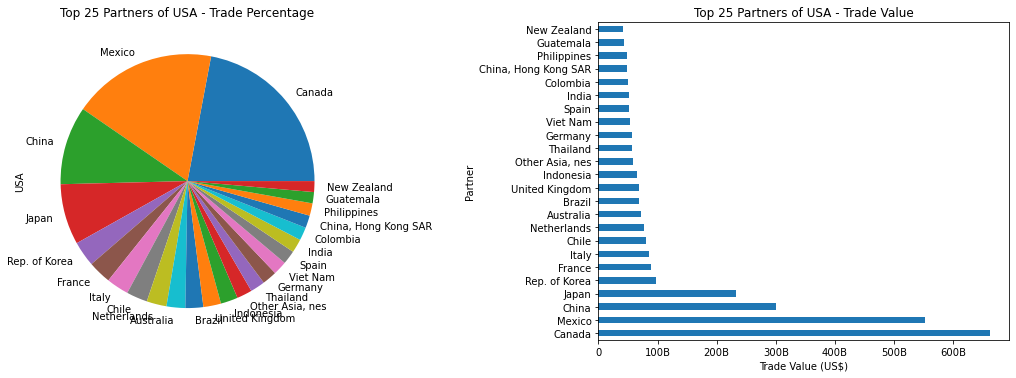

In [18]:
fig_34, ax_34 = plt.subplots(1, 2, figsize=(15, 5))
# unpack all the axes subplots
ax_34_unpack = ax_34.ravel()
# set the layout between different subplots for better visualization
fig_34.tight_layout()
plt.subplots_adjust(wspace=0.5, hspace=0.5)


# since world is included in partner, which is the sum of remaining countries, we need to delete this items
# also when the large number of partnes is not good for visualization, so just choose the top 25 here
USA_partner = reporter_partner['USA'] \
    .sort_values(ascending=False)[1:25]
USA_partner.plot(kind='pie', ax=ax_34_unpack[0], title='Top 25 Partners of USA - Trade Percentage')
USA_partner.plot(kind='barh', ax=ax_34_unpack[1], title='Top 25 Partners of USA - Trade Value')
ax_34_unpack[1].xaxis.set_major_formatter(formatter)
ax_34_unpack[1].xaxis.set_label_text('Trade Value (US$)')


## Partners
Now that we have tried with different reporters, the same procedure can also been applied to different partners

<AxesSubplot:title={'center':'Trade Value Percentage of top 20 partners over 20 years'}, ylabel='Trade Value (US$)'>

<AxesSubplot:title={'center':'Trade Value of top 20 partners over 20 years'}, ylabel='Partner'>

Text(0.5, 24.0, 'Trade Value Growth (US$)')

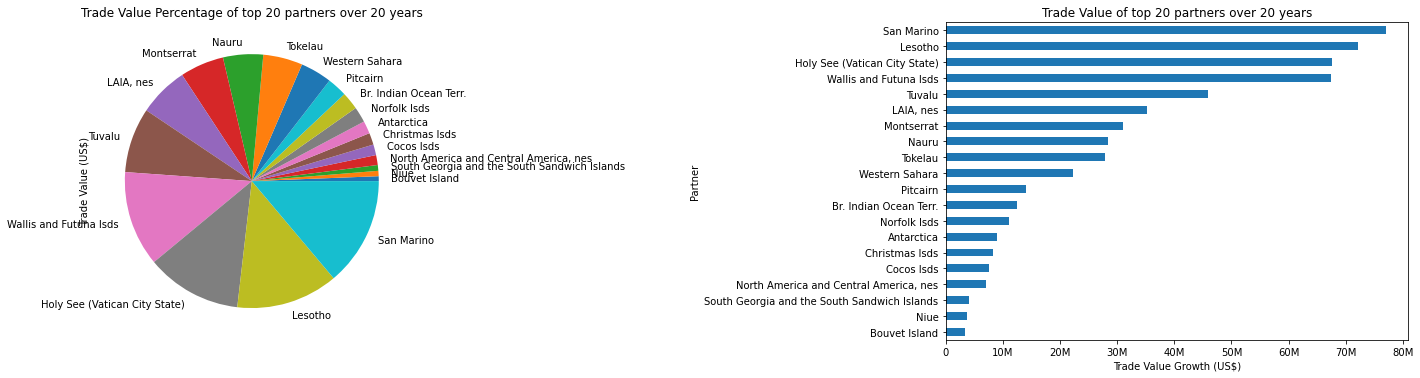

In [32]:
partner_value_order = food_data_clean \
    .groupby("Partner")["Trade Value (US$)"] \
    .sum() \
    .sort_values(ascending=True) \
    .head(21)[1:]


fig_63, ax_63 = plt.subplots(1, 2, figsize=(20, 5))
# unpack all the axes subplots
ax_63_unpack = ax_63.ravel()
# set the layout between different subplots for better visualization
fig_63.tight_layout()
plt.subplots_adjust(wspace=1.0, hspace=0.5)

partner_value_order.plot(ax=ax_63_unpack[0], kind='pie', title='Trade Value Percentage of top 20 partners over 20 years')
partner_value_order.plot(ax=ax_63_unpack[1], kind='barh', title='Trade Value of top 20 partners over 20 years')
ax_63_unpack[1].xaxis.set_major_formatter(formatter)
ax_63_unpack[1].xaxis.set_label_text('Trade Value Growth (US$)')

In [33]:
partner_reporter = food_data_clean['Trade Value (US$)'] \
    .groupby([food_data_clean['Reporter'], food_data_clean['Partner']]) \
    .sum() \
    .unstack()

<AxesSubplot:title={'center':'Reporters of Afghanistan - Trade Percentage'}, ylabel='Afghanistan'>

<AxesSubplot:title={'center':'Reporters of Afghanistan - Trade Value'}, ylabel='Reporter'>

Text(0.5, 24.0, 'Trade Value (US$)')

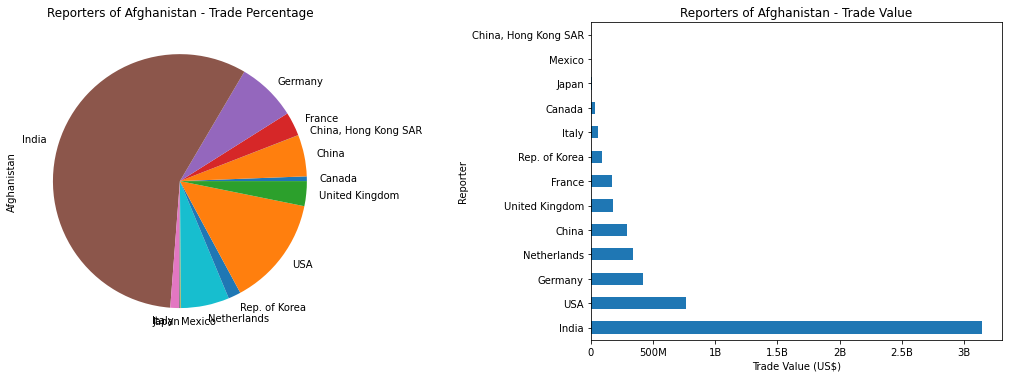

In [21]:
fig_86, ax_86 = plt.subplots(1, 2, figsize=(15, 5))
# unpack all the axes subplots
ax_86_unpack = ax_86.ravel()
# set the layout between different subplots for better visualization
fig_86.tight_layout()
plt.subplots_adjust(wspace=0.5, hspace=0.5)


# show the percentage of each reporters
Afghanistan_reporter = partner_reporter['Afghanistan']
Afghanistan_reporter.plot(kind='pie', ax=ax_86_unpack[0], title='Reporters of Afghanistan - Trade Percentage')

# then the trade value of each reporters
Afghanistan_reporter = partner_reporter['Afghanistan'].sort_values(ascending=False)
Afghanistan_reporter.plot(kind='barh', ax=ax_86_unpack[1], title='Reporters of Afghanistan - Trade Value')
ax_86_unpack[1].xaxis.set_major_formatter(formatter)
ax_86_unpack[1].xaxis.set_label_text('Trade Value (US$)')


## Trade Flow
End up with relationships between different dimensions, now we begin to deal with somewhat individual dimensions. First we can have a look at the dimension - 'Trade Flow'

Don't do much here, since I remember Susan has done a lot in this feature.

<AxesSubplot:title={'center':'Trade Flow count of each reporter'}, ylabel='Reporter'>

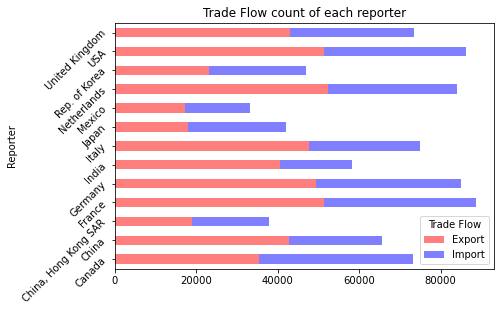

In [36]:
fig_2, ax_2 = plt.subplots()

# set the layout between different subplots for better visualization
fig_2.tight_layout()
plt.subplots_adjust(wspace=0.5, hspace=0.5)


trade_type = food_data_clean.fillna('Unknown Country') \
    .groupby(['Reporter', 'Trade Flow']) \
    .size() \
    .reset_index(name = 'Count')
trade_type_count = trade_type.groupby(['Reporter', 'Trade Flow']).Count.sum()
trade_type_count.unstack().plot(kind='barh', ax=ax_2, stacked=True, color=['r','b'], alpha=0.5, rot=45, title='Trade Flow count of each reporter')